<a href="https://colab.research.google.com/github/Navjotkhatri/Productionization_of_ML_Systems_in_Travel_Industry/blob/main/Gender_Classification_Model_Productionization_of_ML_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification

> Add blockquote


##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [69]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import random
from google.colab import drive
import matplotlib.pyplot as plt
import scipy.stats as stats


import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

## Importing essential libraries to check the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

### Dataset Loading

In [70]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# Load Dataset
users_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Specialisation Track/Model-1 Productionization of ML Systems/CapstoneProject_Travel_Package/traveldata/users.csv")

### Dataset First View

In [72]:
# Dataset First Look
users_df.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


### Dataset Rows & Columns count

In [73]:
# Dataset Rows & Columns count
users_df.shape

(1340, 5)

### Dataset Information

In [74]:
# Dataset Info
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


#### Duplicate Values

In [75]:
# Dataset Duplicate Value Count
users_df.duplicated().sum()

0

#### Missing Values/Null Values

In [76]:
# Missing Values/Null Values Count
users_df.isnull().sum()

,0
code,0
company,0
name,0
gender,0
age,0


<Axes: >

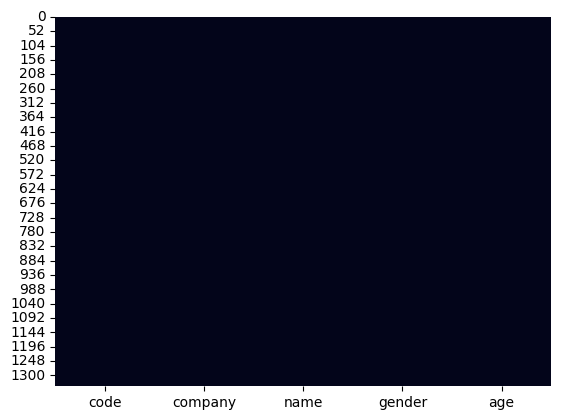

In [77]:
# Visualizing the missing values
sns.heatmap(users_df.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [78]:
# Dataset Columns
users_df.columns

Index(['code', 'company', 'name', 'gender', 'age'], dtype='object')

In [79]:
# Dataset Describe
users_df.describe()

,code,age
count,1340.000000,1340.000000
mean,669.500000,42.742537
std,386.968991,12.869779
min,0.000000,21.000000
25%,334.750000,32.000000
50%,669.500000,42.000000
75%,1004.250000,54.000000
max,1339.000000,65.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [80]:
# Check Unique Values for each variable.
users_df.nunique()

,0
code,1340
company,5
name,1338
gender,3
age,45


## 3. ***Data Wrangling***

### Data Wrangling Code

In [81]:
# Write your code to make your dataset analysis ready.
users_df['gender'].value_counts()

,count
gender,
male,452
female,448
none,440


In [82]:
users_df['company'].value_counts()

,count
company,
4You,453
Acme Factory,261
Wonka Company,237
Monsters CYA,195
Umbrella LTDA,194


In [83]:
users_df['gender'] = users_df['gender'].replace({'none': 'others'})

In [84]:
users_df['gender'].value_counts()

,count
gender,
male,452
female,448
others,440


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

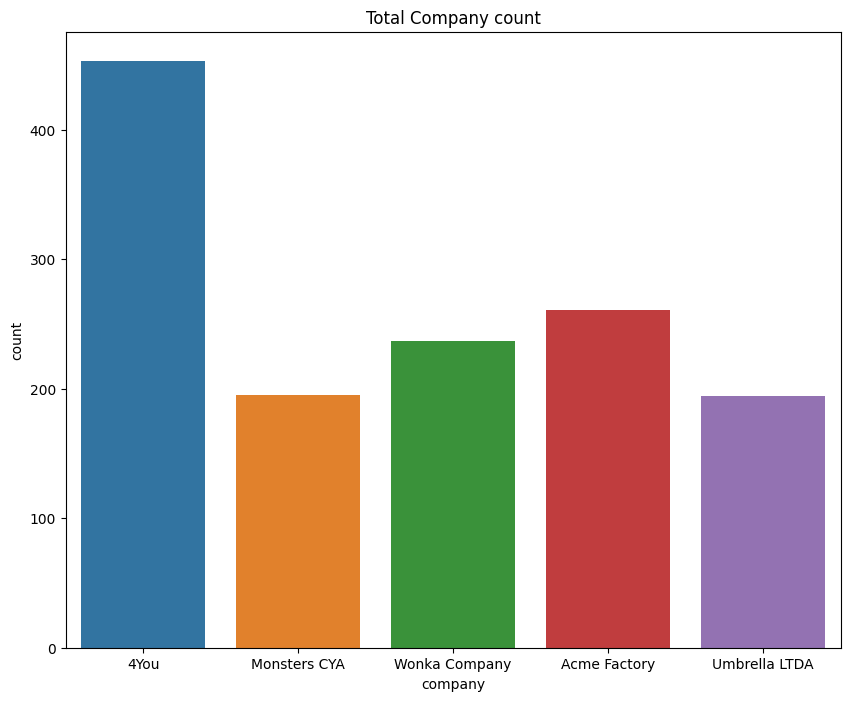

In [85]:
# Chart - 1 visualization code
plt.figure(figsize=(10,8))
sns.countplot(x=users_df['company'], hue=users_df['company'])
plt.title('Total Company count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [86]:
company_count=users_df['company'].value_counts()

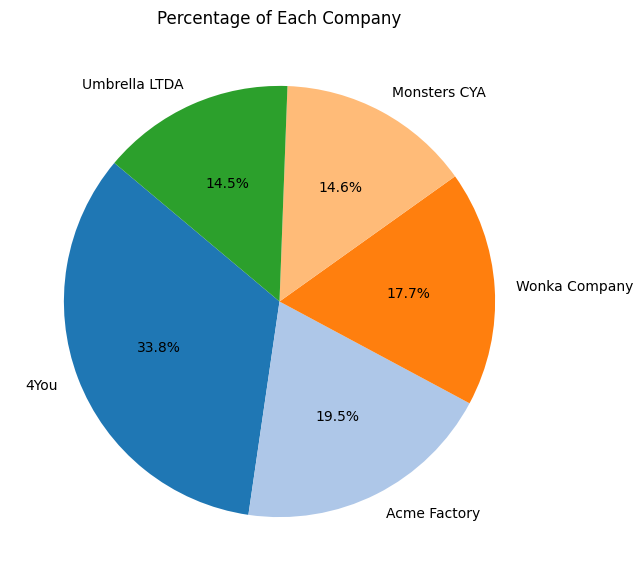

In [87]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 7))
plt.pie(company_count, labels=company_count.index,autopct='%1.1f%%',  startangle=140,colors=plt.get_cmap('tab20').colors)
plt.title('Percentage of Each Company')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

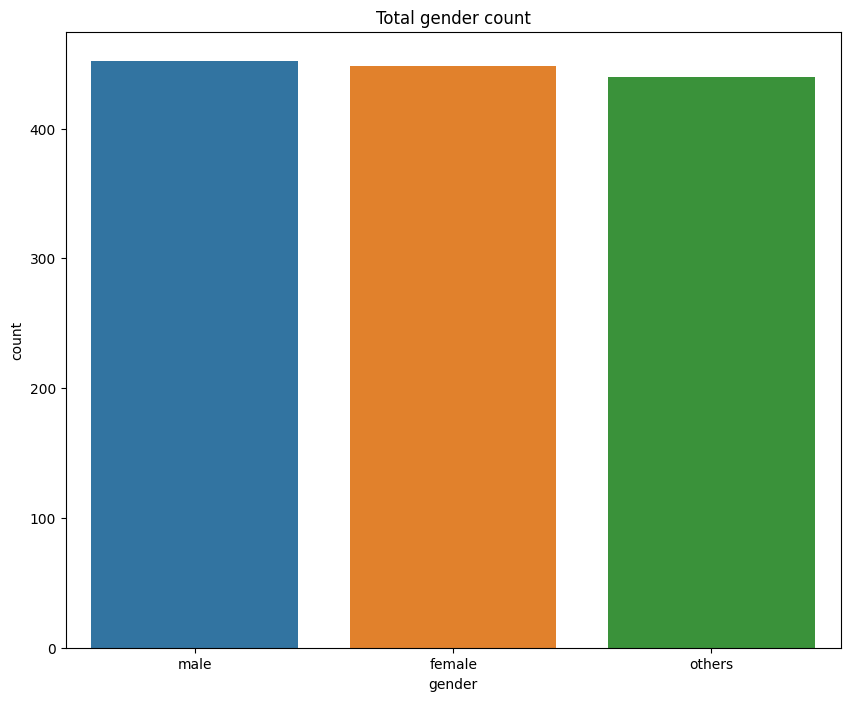

In [88]:
# Chart - 3 visualization code
plt.figure(figsize=(10,8))
sns.countplot(x=users_df['gender'], hue=users_df['gender'])
plt.title('Total gender count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [89]:
gender_count= users_df['gender'].value_counts()
gender_count

,count
gender,
male,452
female,448
others,440


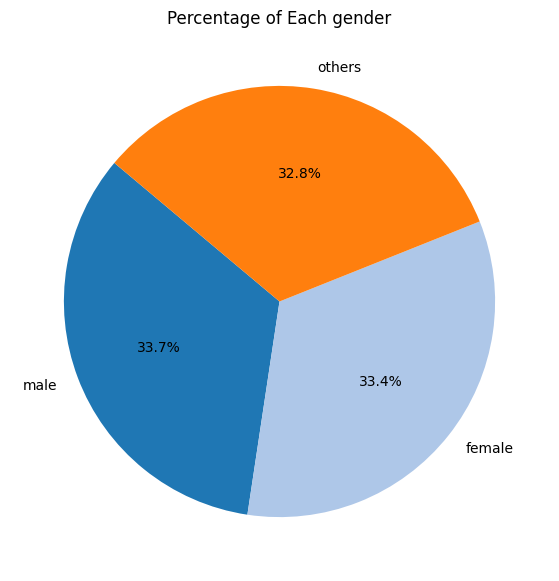

In [90]:
plt.figure(figsize=(10, 7))
plt.pie(gender_count, labels=gender_count.index,autopct='%1.1f%%',  startangle=140,colors=plt.get_cmap('tab20').colors)
plt.title('Percentage of Each gender')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

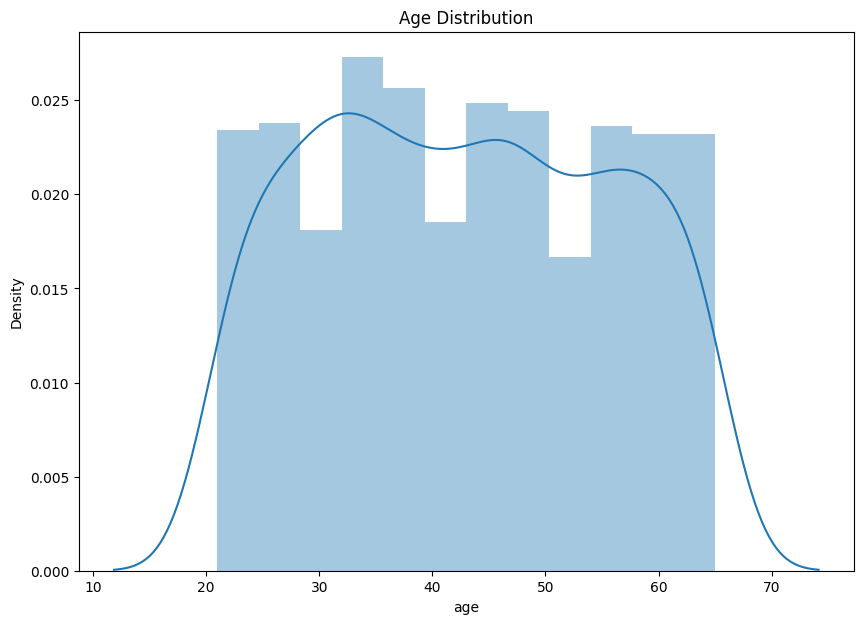

In [91]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 7))
plt.title('Age Distribution')
sns.distplot(users_df['age'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

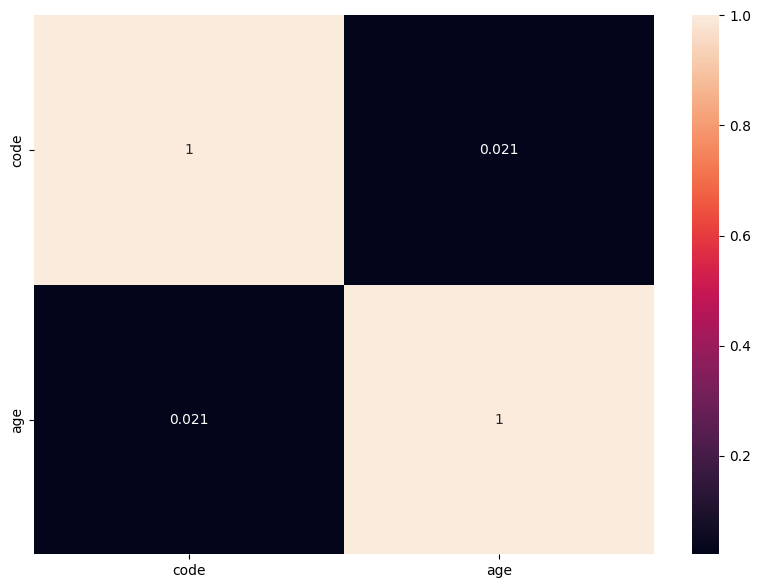

In [92]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10, 7))
sns.heatmap(abs(round(users_df.corr(numeric_only=True),3)), annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

<Figure size 1000x700 with 0 Axes>

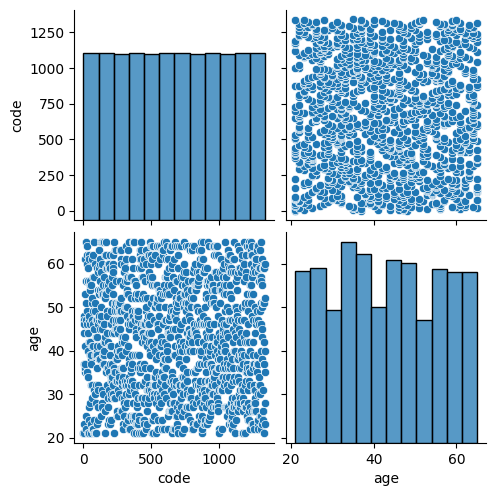

In [93]:
# Pair Plot visualization code
plt.figure(figsize=(10, 7))
sns.pairplot(users_df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothesis 1: Gender Distribution Difference Across Companies

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0): There is no significant difference in the gender distribution across different companies.**

**Alternative Hypothesis (H1): There is a significant difference in the gender distribution across different companies.**

#### 2. Perform an appropriate statistical test.

In [94]:
# Perform Statistical Test to obtain P-Value
# Create a contingency table
contingency_table = pd.crosstab(users_df['company'], users_df['gender'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2: {chi2}, p-value: {p}")

if p < 0.05:
    print("Reject the null hypothesis. There is a significant difference in gender distribution across companies.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in gender distribution across companies.")

Chi2: 8.624253107064671, p-value: 0.37497758316777535
Fail to reject the null hypothesis. There is no significant difference in gender distribution across companies.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2 Average Age Difference by Gender

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0): The average age of users does not differ significantly between genders.**

**Alternative Hypothesis (H1): The average age of users differs significantly between genders.**

#### 2. Perform an appropriate statistical test.

In [95]:
# Perform Statistical Test to obtain P-Value
male_ages = users_df[users_df['gender'] == 'male']['age']
female_ages = users_df[users_df['gender'] == 'female']['age']

# Perform t-Test
t_stat, p_val = stats.ttest_ind(male_ages, female_ages)

print(f"t-statistic: {t_stat}, p-value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis. The average age of users differs significantly between genders.")
else:
    print("Fail to reject the null hypothesis. The average age of users does not differ significantly between genders.")

t-statistic: -0.5523811049444188, p-value: 0.5808247279201074
Fail to reject the null hypothesis. The average age of users does not differ significantly between genders.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3  Age Distribution Variation Across Companies

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0): There is no significant variation in the age distribution across different companies.**

**Alternative Hypothesis (H1): There is a significant variation in the age distribution across different companies.**

#### 2. Perform an appropriate statistical test.

In [96]:
# Perform Statistical Test to obtain P-Value
groups = users_df.groupby('company')['age'].apply(list)

# Perform ANOVA
f_stat, p_val = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat}, p-value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis. There is a significant variation in the age distribution across companies.")
else:
    print("Fail to reject the null hypothesis. There is no significant variation in the age distribution across companies.")

F-statistic: 0.6402914487392698, p-value: 0.6338133393317209
Fail to reject the null hypothesis. There is no significant variation in the age distribution across companies.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [97]:
# Handling Missing Values & Missing Value Imputation
users_df.isnull().sum()

,0
code,0
company,0
name,0
gender,0
age,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

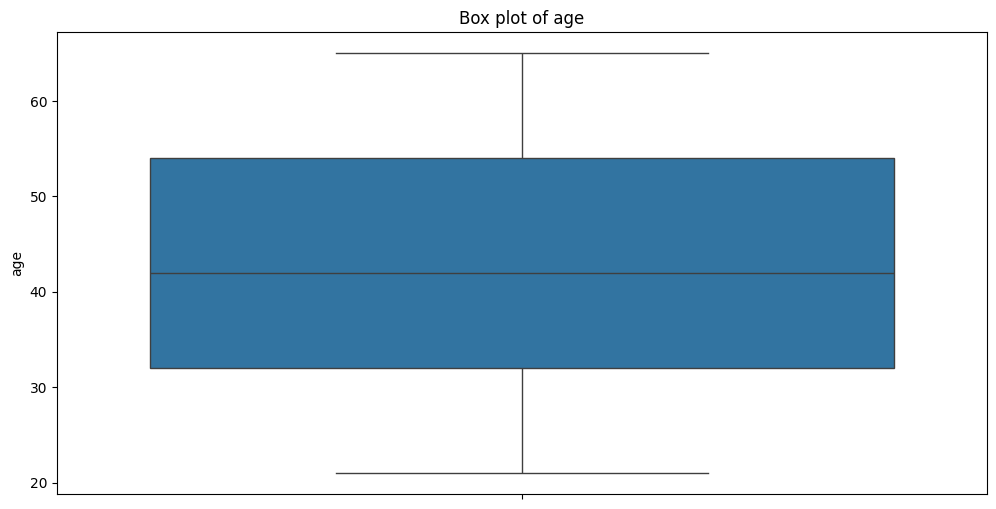

In [98]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(12,6))
plt.title("Box plot of age")
ax = sns.boxplot(data=users_df['age'])

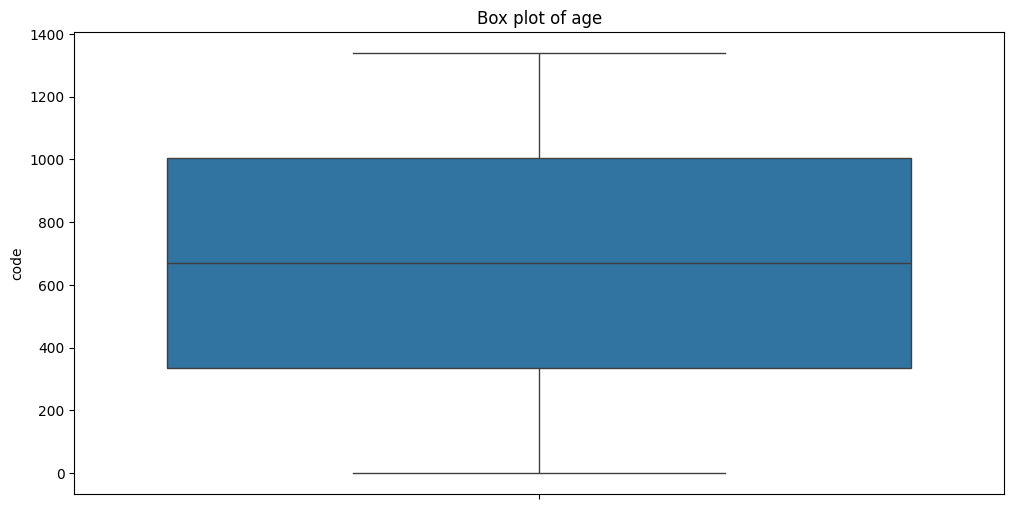

In [99]:
plt.figure(figsize=(12,6))
plt.title("Box plot of age")
ax = sns.boxplot(data=users_df['code'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [100]:
# Encode your categorical columns
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [101]:
users_df.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [102]:
users_df['name'].dtype

dtype('O')

In [103]:
users_categorical_data =users_df.select_dtypes(exclude=['int64', 'float','int32'])
users_numerical_data = users_df.select_dtypes(include=['int64', 'float','int32'])

In [104]:
users_categorical_data

,company,name,gender
0,4You,Roy Braun,male
1,4You,Joseph Holsten,male
2,4You,Wilma Mcinnis,female
3,4You,Paula Daniel,female
4,4You,Patricia Carson,female
...,...,...,...
1335,Umbrella LTDA,Albert Garroutte,male
1336,Umbrella LTDA,Kim Shores,female
1337,Umbrella LTDA,James Gimenez,male
1338,Umbrella LTDA,Viola Agosta,female


In [105]:
le = LabelEncoder()
users_categorical_data = users_categorical_data.apply(LabelEncoder().fit_transform)
users_categorical_data.head()

,company,name,gender
0,0,1121,1
1,0,653,1
2,0,1324,0
3,0,1013,0
4,0,997,0


In [106]:
users_final_df= pd.concat([users_categorical_data,users_numerical_data], axis=1)

In [107]:
users_final_df.head()

,company,name,gender,code,age
0,0,1121,1,0,21
1,0,653,1,1,37
2,0,1324,0,2,48
3,0,1013,0,3,23
4,0,997,0,4,44


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [108]:
users_final_df.corr()

,company,name,gender,code,age
company,1.000000,0.005064,-0.038401,0.601196,0.010283
name,0.005064,1.000000,-0.054836,0.009370,0.028089
gender,-0.038401,-0.054836,1.000000,-0.024700,-0.026727
code,0.601196,0.009370,-0.024700,1.000000,-0.021087
age,0.010283,0.028089,-0.026727,-0.021087,1.000000


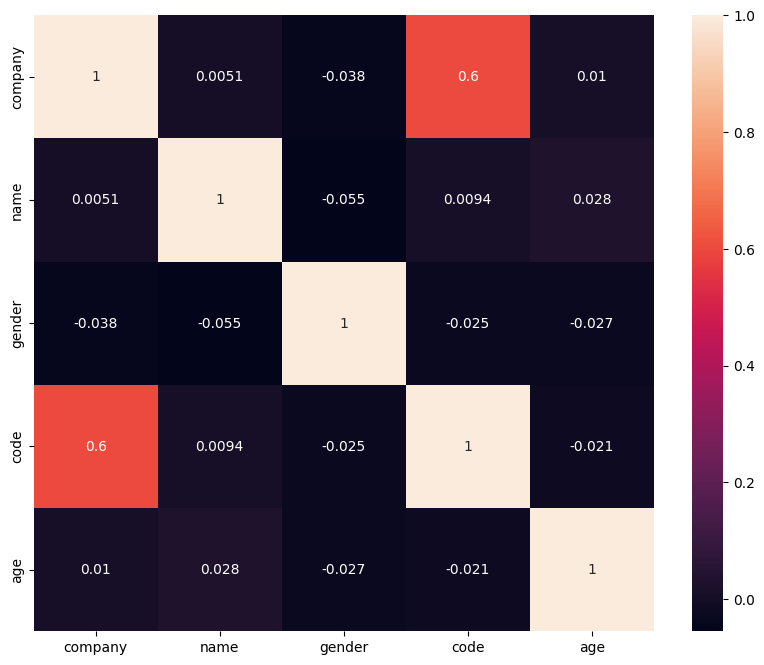

In [109]:
# Manipulate Features to minimize feature correlation and create new features
plt.figure(figsize=(10,8))
sns.heatmap(users_final_df.corr(), annot=True)
plt.show()

#### 2. Feature Selection

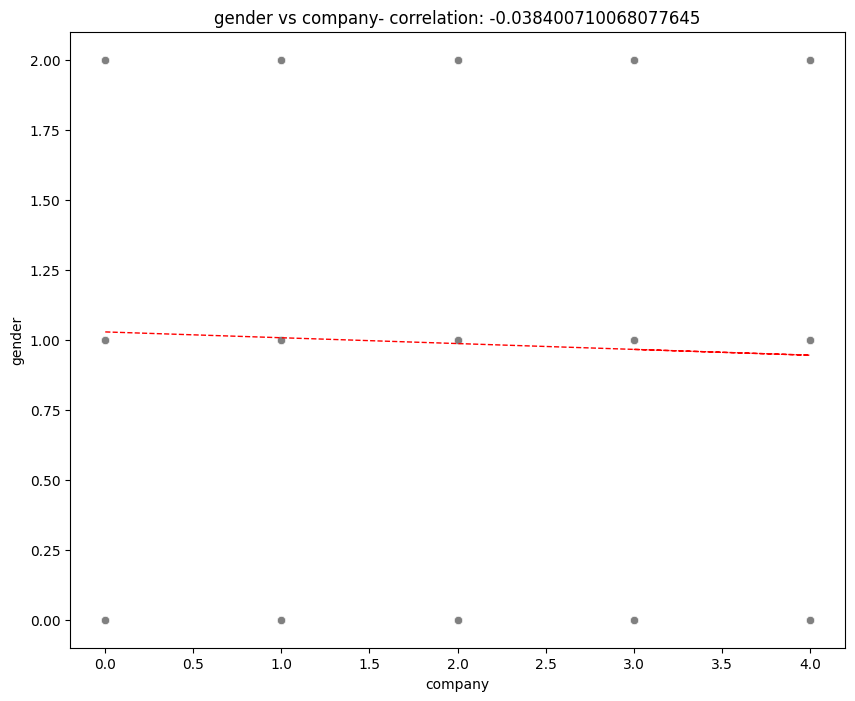

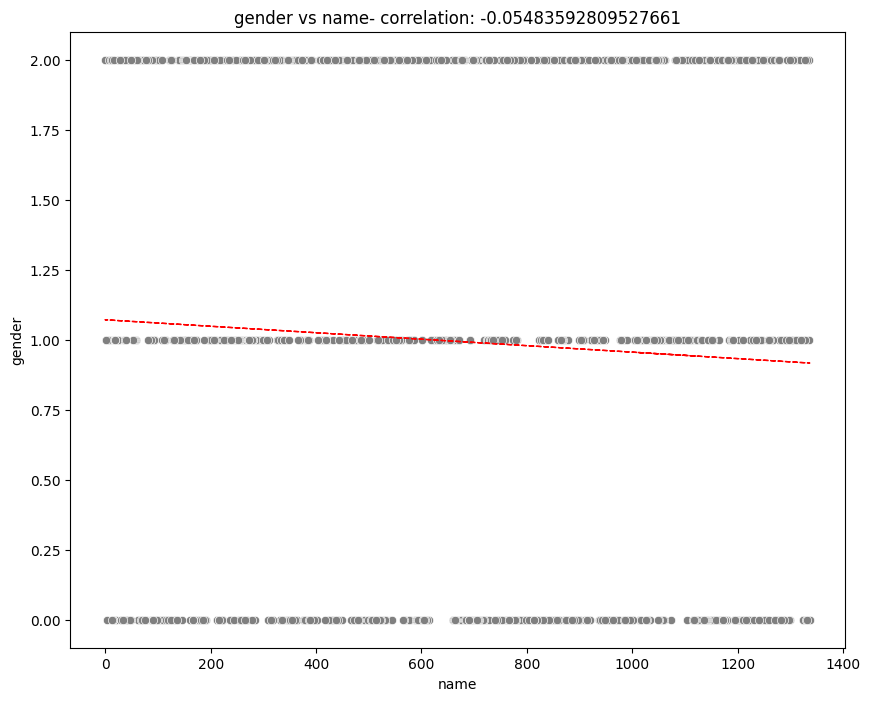

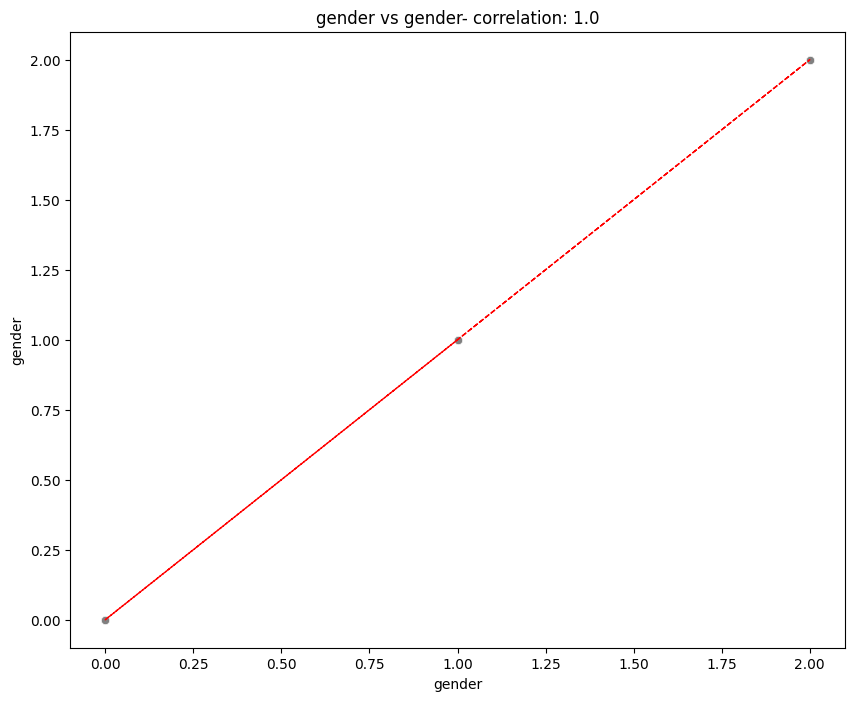

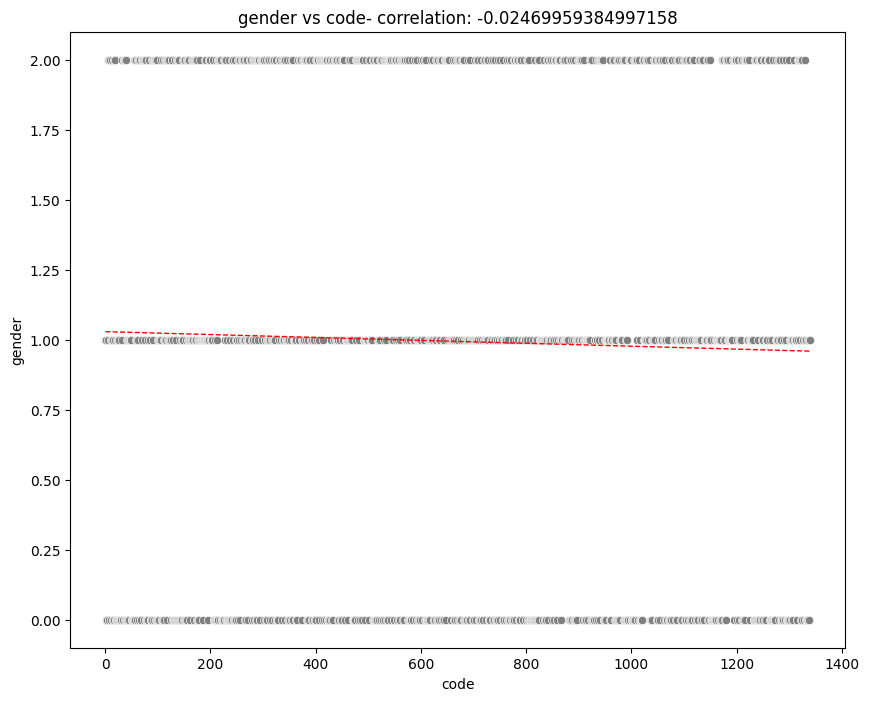

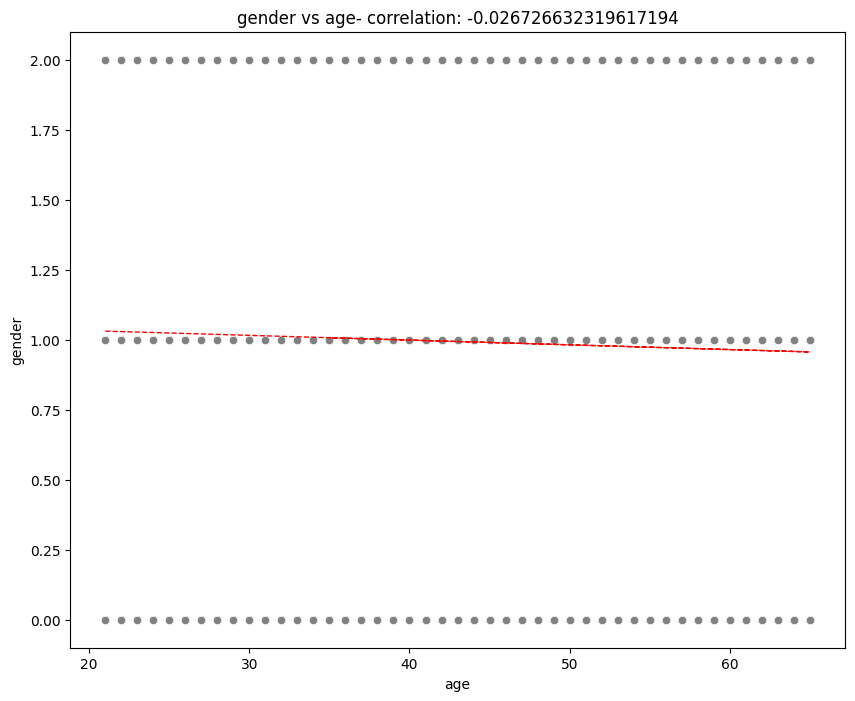

In [126]:
# Select your features wisely to avoid overfitting
for col in users_final_df.describe().columns.tolist():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca()
    feature = users_final_df[col]
    label = users_final_df['gender']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="gray")
    plt.xlabel(col)
    plt.ylabel('gender')
    ax.set_title('gender vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(users_final_df[col], users_final_df['gender'], 1)
    y_hat = np.poly1d(z)(users_final_df[col])
    plt.plot(users_final_df[col], y_hat, "r--", lw=1)
    plt.show()

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [111]:
# Transform Your data


### 6. Data Scaling

In [112]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [113]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [114]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

Answer Here.

In [127]:
counts=users_df['gender'].value_counts()
counts

,count
gender,
male,452
female,448
others,440


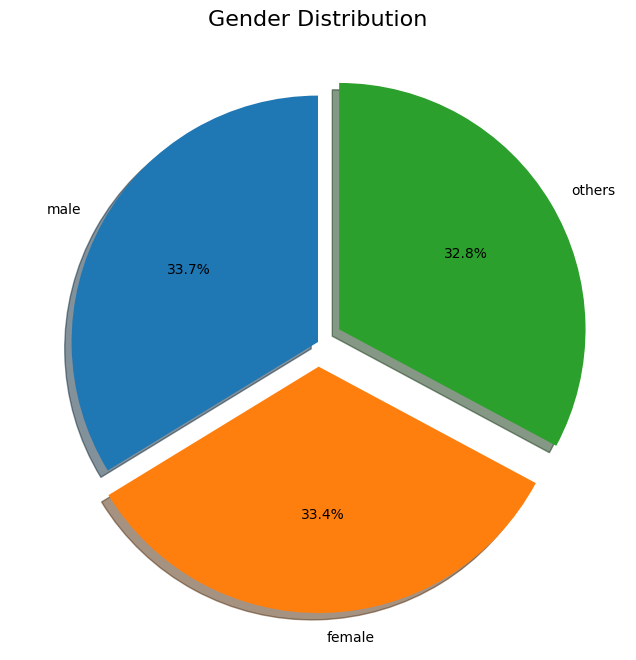

In [128]:
# Handling Imbalanced Dataset (If needed)
labels = ['male', 'female','others']
plt.figure(figsize=(10,8))
plt.pie(counts, labels=labels, autopct= "%1.1f%%",
        startangle=90, shadow=True, explode=[0,.1,.1])
plt.title('Gender Distribution', fontsize=16)
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [116]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [117]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [118]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [119]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [120]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [121]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [122]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [123]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [124]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [125]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***